In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

In [11]:
hkws_dzjy = pd.read_csv('hkws_dzjy.csv', encoding='GBK')

hkws_dzjy['month'] = hkws_dzjy.tradeDate.str.slice(0,7)

hkws_dzjyVol_month = hkws_dzjy.groupby('month').tradeVol.sum()

hkws_dzjy.groupby('month').tradeVol.sum()

month
2011-01       4.30
2011-08    1628.00
2012-02     470.00
2012-03    1385.00
2012-05    1346.00
            ...   
2016-06    2802.98
2016-07     502.49
2016-08      20.00
2016-09     365.47
2016-10     422.42
Name: tradeVol, dtype: float64

In [31]:
hkws_rzrq = pd.read_csv('hkws_rzrq.csv', encoding='GBK')

hkws_rzrq.sort_index(axis=0 ,ascending=False, inplace=True)
hkws_rzrq['date'] = pd.to_datetime(hkws_rzrq.tradeDate)
hkws_rzrq.set_index('date', inplace=True)

hkws_rzrq['month'] = hkws_rzrq.tradeDate.str.slice(0,7)

hkws_rzbuy_month = hkws_rzrq.groupby('month').finBuyVal.sum()

hkws_rzrq.groupby('month').finBuyVal.sum()

month
2015-10     805661448
2015-11    4427895475
2015-12    1958095671
2016-01    1123509165
2016-02     905513408
              ...    
2016-06     724302980
2016-07    1383354286
2016-08     948279611
2016-09     376473812
2016-10     536794676
Name: finBuyVal, dtype: int64

In [28]:
hkwsPrice = pd.read_csv('hkws_prices.csv', encoding='GBK')
hkwsPrice['month'] = hkwsPrice.tradeDate.str.slice(0,7)

hkws_avgPriceMonth = hkwsPrice.groupby('month').closePrice.mean()
hkwsPrice.groupby('month').closePrice.mean()

month
2010-05     6.425000
2010-06     6.120684
2010-07     5.358864
2010-08     6.006318
2010-09     5.576158
             ...    
2016-06    21.125000
2016-07    24.423810
2016-08    25.609130
2016-09    24.553000
2016-10    24.843077
Name: closePrice, dtype: float64

In [38]:
avgMonPrice = pd.DataFrame({'month':hkws_avgPriceMonth.index, 'price':hkws_avgPriceMonth})
avgMonPrice

,month,price
month,,
2010-05,2010-05,6.425000
2010-06,2010-06,6.120684
2010-07,2010-07,5.358864
2010-08,2010-08,6.006318
2010-09,2010-09,5.576158
...,...,...
2016-06,2016-06,21.125000
2016-07,2016-07,24.423810
2016-08,2016-08,25.609130


In [37]:
rzbuy_month = pd.DataFrame({'month':hkws_rzbuy_month.index, 'buyVal':hkws_rzbuy_month})
rzbuy_month

,buyVal,month
month,,
2015-10,805661448,2015-10
2015-11,4427895475,2015-11
2015-12,1958095671,2015-12
2016-01,1123509165,2016-01
2016-02,905513408,2016-02
...,...,...
2016-06,724302980,2016-06
2016-07,1383354286,2016-07
2016-08,948279611,2016-08


In [45]:
hkws_dzbuy_avgPrice = pd.merge(rzbuy_month, avgMonPrice, on='month', how='left')
hkws_dzbuy_avgPrice

,buyVal,month,price
0,805661448,2015-10,22.577353
1,4427895475,2015-11,23.273762
2,1958095671,2015-12,22.570391
3,1123509165,2016-01,18.401650
4,905513408,2016-02,17.864500
5,1164767693,2016-03,19.659261
6,713913202,2016-04,20.123300
7,726040518,2016-05,20.668238
8,724302980,2016-06,21.125000
9,1383354286,2016-07,24.423810


In [50]:
hkws_dzbuy_avgPrice['date'] = pd.to_datetime(hkws_dzbuy_avgPrice.month)
hkws_dzbuy_avgPrice.set_index('date', inplace=True)
hkws_dzbuy_avgPrice

,buyVal,month,price
date,,,
2015-10-01,805661448,2015-10,22.577353
2015-11-01,4427895475,2015-11,23.273762
2015-12-01,1958095671,2015-12,22.570391
2016-01-01,1123509165,2016-01,18.401650
2016-02-01,905513408,2016-02,17.864500
2016-03-01,1164767693,2016-03,19.659261
2016-04-01,713913202,2016-04,20.123300
2016-05-01,726040518,2016-05,20.668238
2016-06-01,724302980,2016-06,21.125000


In [60]:
hkws_dzbuy_avgPrice.buyVal.min()

376473812

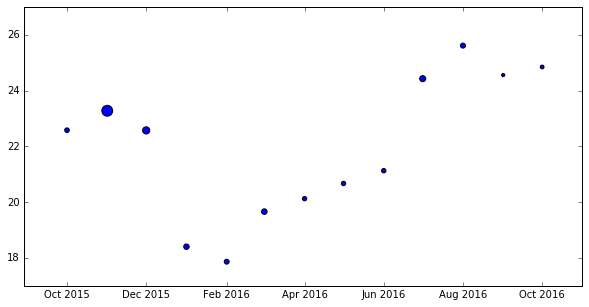

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(hkws_dzbuy_avgPrice.index,
            # attacker size in year 298 as the y axis
            hkws_dzbuy_avgPrice.price, 
           s=10*hkws_dzbuy_avgPrice.buyVal/hkws_dzbuy_avgPrice.buyVal.min())